<a href="https://colab.research.google.com/github/mhdh-9/Image-Processing/blob/main/Image_Compression_using_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

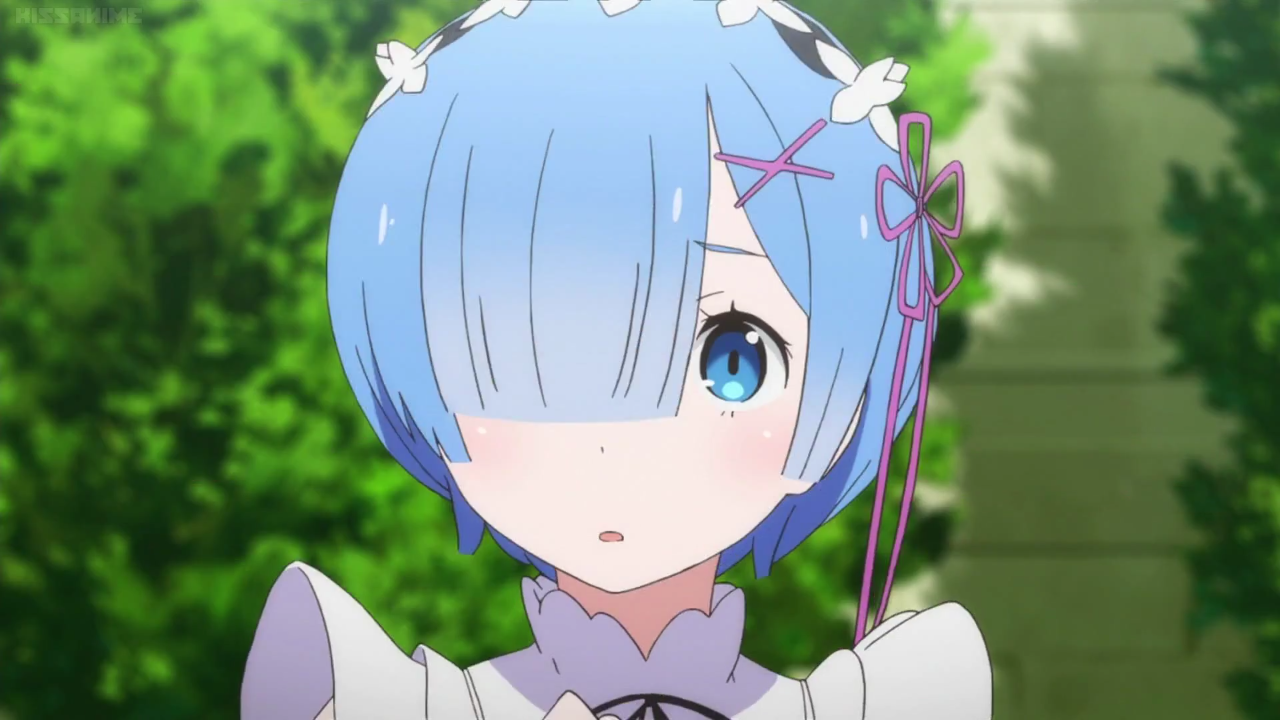

In [15]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#upload the image before running 
img = cv2.imread('rem.png')
if img is None:
    print("Could not read the image -> upload the image, if not uploaded")
    sys.exit()
    
cv2_imshow(img)



# DCT Image Compression
 


---


Function Definition

In [16]:
def DCT(img,threshold):
  img = img.astype(float)

  B=16 #blocksize

  h,w=np.array(img.shape[:2])//B * B

  img=img[:h,:w]

  blocksV=h//B
  blocksH=w//B
  vis0 = np.zeros((h,w), np.float32)
  Trans = np.zeros((h,w), np.float32)
  vis0[:h, :w] = img
  for row in range(blocksV):
          for col in range(blocksH):
                  currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                  Trans[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
  cv2.imwrite('Transformed.jpg', Trans)

  # Threshold
  dct_thresh = Trans * (abs(Trans) > (threshold*np.max(Trans)))

  Compressed_img = np.zeros(img.shape, np.float32)

  for row in range(blocksV):
          for col in range(blocksH):
                  currentblock = cv2.idct(dct_thresh[row*B:(row+1)*B,col*B:(col+1)*B])
                  Compressed_img[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

  cv2.imwrite('Compressed_img.jpg',Compressed_img)
    
  return Compressed_img    

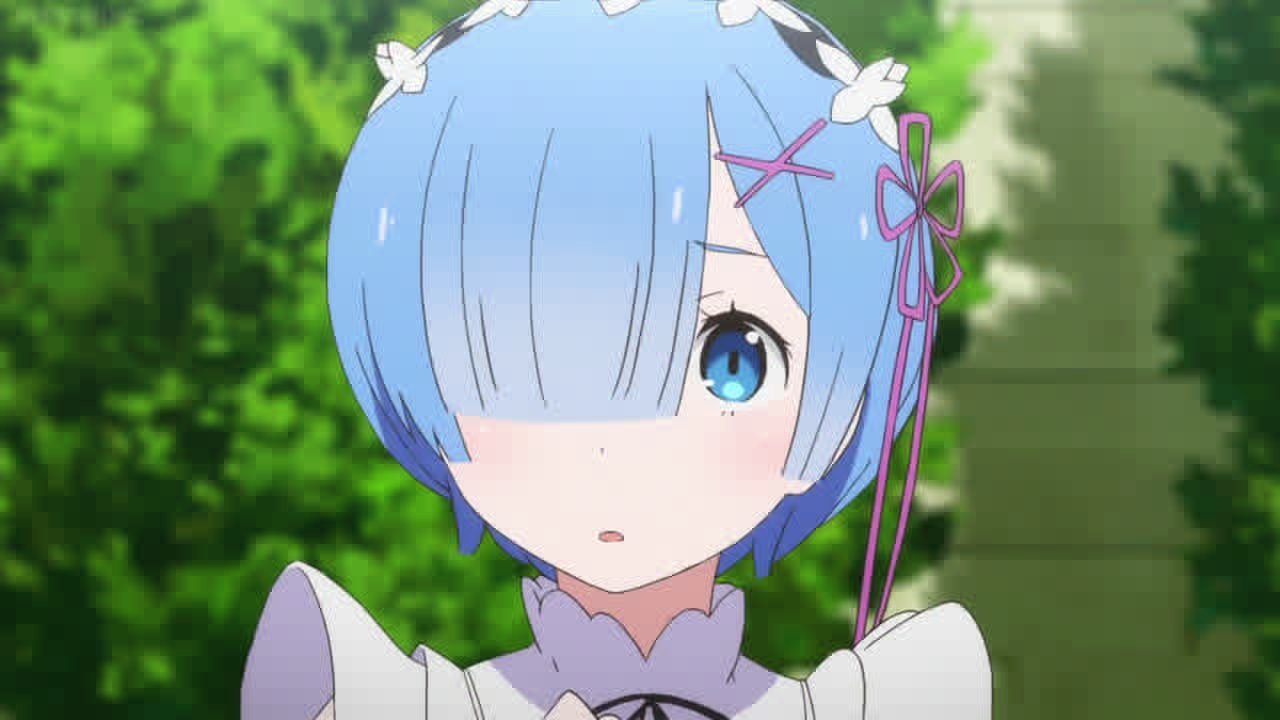

In [17]:
threshold = 0.01
b,g,r = cv2.split(img)
b = DCT(b,threshold)
g = DCT(g,threshold)
r = DCT(r,threshold)
Compressed_img=cv2.merge([b,g,r])
cv2.imwrite('Compressed.jpg',Compressed_img)
cv2_imshow(Compressed_img)
